In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import missingno as msno

# data viz
import seaborn as sns
from matplotlib import pyplot as plt

# sklearn - other
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# sklearn - ML models
from sklearn.ensemble import RandomForestClassifier

# lightgbm
# import lightgbm as lgbm

# xgboost
# import xgboost as xgb

# catboost
# import catboost as cb

In [3]:
songs_df = pd.read_csv("songs.csv")
songs_extra_df = pd.read_csv("song_extra_info.csv")
members_df = pd.read_csv("members.csv")
no_rows = 100000
train_df = pd.read_csv("train.csv", nrows = no_rows)

merge_traindf_songsdf = pd.merge(train_df, songs_df, on='song_id', how='left')
t_s_se = pd.merge(merge_traindf_songsdf, songs_extra_df, on='song_id', how='left')
songs = pd.merge(t_s_se, members_df, on='msno', how='left')
del songs_df, songs_extra_df, members_df, train_df, merge_traindf_songsdf, t_s_se
songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


In [4]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    100000 non-null  object 
 1   song_id                 100000 non-null  object 
 2   source_system_tab       99697 non-null   object 
 3   source_screen_name      95727 non-null   object 
 4   source_type             99805 non-null   object 
 5   target                  100000 non-null  int64  
 6   song_length             99996 non-null   float64
 7   genre_ids               98498 non-null   object 
 8   artist_name             99996 non-null   object 
 9   composer                78528 non-null   object 
 10  lyricist                59309 non-null   object 
 11  language                99996 non-null   float64
 12  name                    99991 non-null   object 
 13  isrc                    91475 non-null   object 
 14  city                 

In [5]:
songs.isnull().sum()

msno                          0
song_id                       0
source_system_tab           303
source_screen_name         4273
source_type                 195
target                        0
song_length                   4
genre_ids                  1502
artist_name                   4
composer                  21472
lyricist                  40691
language                      4
name                          9
isrc                       8525
city                          0
bd                            0
gender                    38672
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

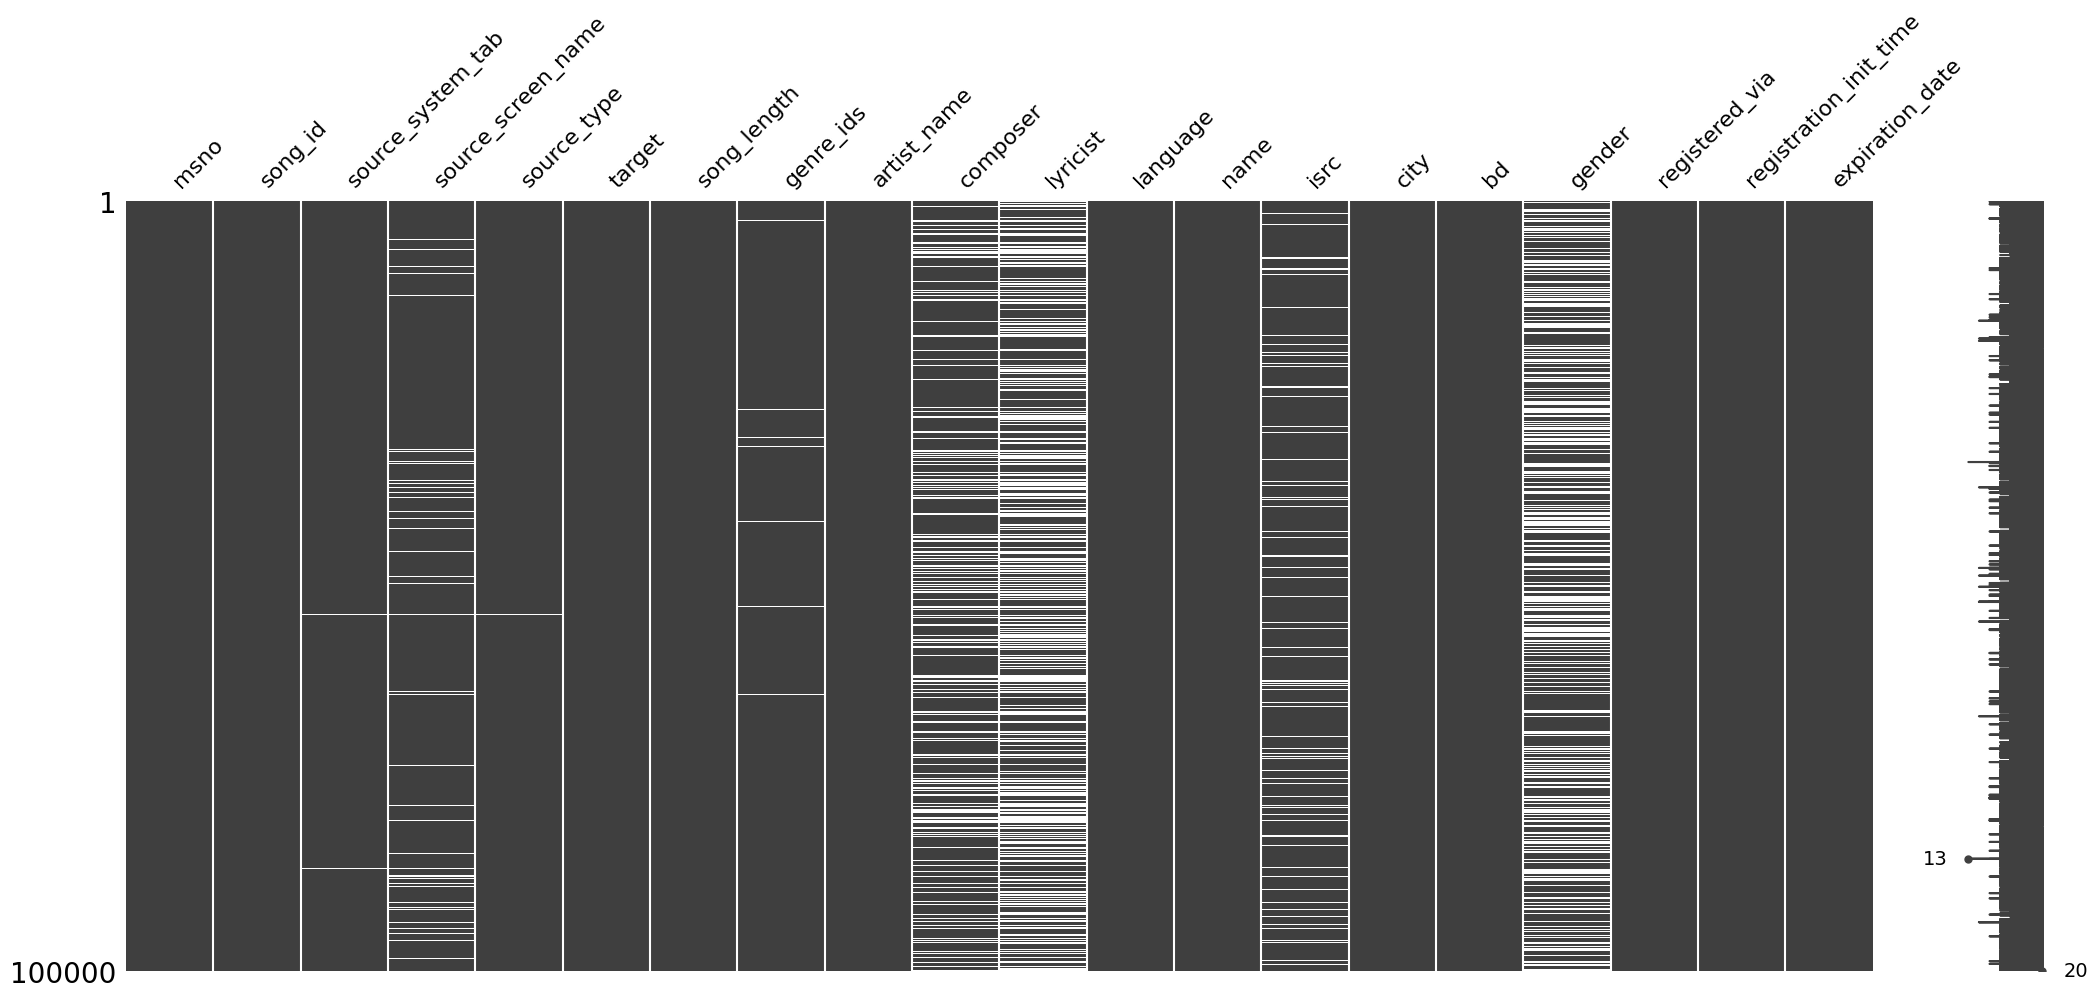

In [6]:
msno.matrix(songs)
for i in songs.select_dtypes(include=['object']).columns:
    songs[i][songs[i].isnull()] = 'unknown'
songs = songs.fillna(value=0)

# songs.dropna(inplace=True)

In [7]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    100000 non-null  object 
 1   song_id                 100000 non-null  object 
 2   source_system_tab       100000 non-null  object 
 3   source_screen_name      100000 non-null  object 
 4   source_type             100000 non-null  object 
 5   target                  100000 non-null  int64  
 6   song_length             100000 non-null  float64
 7   genre_ids               100000 non-null  object 
 8   artist_name             100000 non-null  object 
 9   composer                100000 non-null  object 
 10  lyricist                100000 non-null  object 
 11  language                100000 non-null  float64
 12  name                    100000 non-null  object 
 13  isrc                    100000 non-null  object 
 14  city                 

In [8]:
# registration_init_time
songs.registration_init_time = pd.to_datetime(songs.registration_init_time, format='%Y%m%d', errors='ignore')
songs['registration_init_time_year'] = songs['registration_init_time'].dt.year
songs['registration_init_time_month'] = songs['registration_init_time'].dt.month
songs['registration_init_time_day'] = songs['registration_init_time'].dt.day

# expiration_date
songs.expiration_date = pd.to_datetime(songs.expiration_date,  format='%Y%m%d', errors='ignore')
songs['expiration_date_year'] = songs['expiration_date'].dt.year
songs['expiration_date_month'] = songs['expiration_date'].dt.month
songs['expiration_date_day'] = songs['expiration_date'].dt.day

In [9]:
songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,...,unknown,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,unknown,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,unknown,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5


In [10]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   msno                          100000 non-null  object        
 1   song_id                       100000 non-null  object        
 2   source_system_tab             100000 non-null  object        
 3   source_screen_name            100000 non-null  object        
 4   source_type                   100000 non-null  object        
 5   target                        100000 non-null  int64         
 6   song_length                   100000 non-null  float64       
 7   genre_ids                     100000 non-null  object        
 8   artist_name                   100000 non-null  object        
 9   composer                      100000 non-null  object        
 10  lyricist                      100000 non-null  object        
 11  language      

In [11]:
label_encoder = LabelEncoder()

for i in songs.columns :
    songs[i] = label_encoder.fit_transform(songs[i])

In [30]:
# songs.info()

In [12]:
y = songs['target']

In [13]:
y.value_counts(normalize=True)

1    0.75068
0    0.24932
Name: target, dtype: float64

In [14]:
# imbalance data

In [15]:
y.shape

(100000,)

In [16]:
X = songs.drop('target', axis =1)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   msno                          100000 non-null  int32
 1   song_id                       100000 non-null  int32
 2   source_system_tab             100000 non-null  int32
 3   source_screen_name            100000 non-null  int32
 4   source_type                   100000 non-null  int32
 5   song_length                   100000 non-null  int64
 6   genre_ids                     100000 non-null  int32
 7   artist_name                   100000 non-null  int32
 8   composer                      100000 non-null  int32
 9   lyricist                      100000 non-null  int32
 10  language                      100000 non-null  int64
 11  name                          100000 non-null  int32
 12  isrc                          100000 non-null  int32
 13  city           

In [18]:
X.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,1647,6022,1,6,5,3514,94,424,1615,3159,...,2,2,1176,328,8,0,1,4,9,4
1,3471,18027,3,7,4,8946,28,3757,7664,3159,...,0,3,974,304,7,4,24,4,8,10
2,3471,9744,3,7,4,4973,28,2550,5137,3159,...,0,3,974,304,7,4,24,4,8,10
3,3471,1868,3,7,4,7194,1,3231,4202,3159,...,0,3,974,304,7,4,24,4,8,10
4,1647,2688,1,6,5,2330,0,561,970,3159,...,2,2,1176,328,8,0,1,4,9,4


In [19]:
# Scaling X
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [21]:
rf = RandomForestClassifier(
        n_estimators = 1000,
        class_weight={0: 1.0050505050505052, 1: 0.9949494949494948}
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.0050505050505052,
                                     1: 0.9949494949494948},
                       n_estimators=1000)

In [22]:
import pickle 

In [23]:
with open("new_rand_forest.pkl", "wb") as f:
    pickle.dump(rf, f)

In [24]:
pred = rf.predict(X_test)

In [25]:
pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [26]:
c_report = classification_report(pred, y_test)
print(c_report)

              precision    recall  f1-score   support

           0       0.58      0.76      0.66      3799
           1       0.94      0.87      0.90     16201

    accuracy                           0.85     20000
   macro avg       0.76      0.82      0.78     20000
weighted avg       0.87      0.85      0.86     20000



In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.85045